In [ ]:
### ML Algorithms - Exercise 1
### Name - Chethan Kashyap Bangalore Muralidhara
### Date - 16-03-2023
### Completed Exercises - 1,2,3,4,5,6(All)

In [1]:
with open('C:/Users/chethankashyap/ML Data/Data.txt') as f:
    contents = f.read()
    print(contents)

 8.02842792e-001 -1.65104615e+000
 9.14032827e-001 9.83098955e-001
 1.51860225e+000 9.78617627e-001
 1.87321608e+000 -1.43614587e-001
 1.44452675e+000 8.73959844e-001
 -7.41959162e-001 8.06176028e-002
 1.75606377e+000 -1.02566189e+000
 1.30401919e+000 1.64416047e-001
 -2.55429374e+000 5.88558143e-001
 -1.17371025e+000 -4.63940782e-001
 -3.49388128e-001 -2.33865467e+000
 6.07277692e-001 -5.84326532e-002
 -1.47087297e-002 1.73951296e+000
 -4.59794708e-001 -1.06985700e-001
 -7.51294185e-001 2.07903492e-001
 -6.65101197e-001 -2.62164651e-001
 2.26772362e+000 -6.37973142e-002
 -9.32613895e-001 1.74402896e-001
 3.52783640e-001 4.10215412e-001
 4.47028680e-001 2.17408380e+000
 1.80318161e+000 -6.06187116e-001
 2.06947122e-001 1.03039341e+000
 1.23989322e-001 1.46476574e+000
 -1.71959746e-001 -5.14423368e-001
 -8.24858516e-001 8.19306754e-001
 1.26135237e+000 1.81221134e+000
 1.09530357e+000 1.38954101e-001
 -1.35296394e+000 -6.92997547e-001
 8.23297515e-001 -7.93862557e-001
 5.65398903e-001 -

In [2]:
###Question 1

import numpy as np

# Coordinates of the two points
p1 = np.array([-2, 6])
p2 = np.array([6, -2])

# Slope of the line passing through p1 and p2
slope = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Unit weight vector w perpendicular to line l
w = np.array([-slope, 1]) / np.sqrt(slope**2 + 1)

print("Unit weight vector w:", w)

Unit weight vector w: [0.70710678 0.70710678]


In [4]:
###Question 2

# Define the two points on line l
p1 = np.array([-2, 6])
p2 = np.array([6, -2])

# Calculate the unit weight vector w perpendicular to line l
slope = (p2[1] - p1[1]) / (p2[0] - p1[0])
w = np.array([1, -1 / slope]) / np.linalg.norm(np.array([1, -1 / slope]))

# Load the data from Data.txt
data = np.loadtxt('C:/Users/chethankashyap/ML Data/Data.txt')

# Separate the data into C1 and C2 arrays
C1 = data[:100]
C2 = data[100:200]

# Calculate the dot product of w with each point in C1 and C2
C1_dot = np.dot(C1, w)
C2_dot = np.dot(C2, w)

# Calculate the threshold t
t = (np.min(C1_dot) + np.max(C2_dot)) / 2

# Classify the remaining 12 points based on their dot product with w
unknown_points = data[200:]
unknown_dot = np.dot(unknown_points, w)

C1_unknown = unknown_points[unknown_dot < t]
C2_unknown = unknown_points[unknown_dot > t]

print("Points in class C1:", C1_unknown)
print("Points in class C2:", C2_unknown)

Points in class C1: [[ 0.16026594 -1.06234105]
 [ 0.30104196  0.74522405]
 [ 0.46646615  0.32760407]
 [ 0.90292727  0.99105336]
 [-0.37900411  1.84875078]
 [-0.28377688 -3.37572261]]
Points in class C2: [[2.81614998 4.24887669]
 [4.72136853 6.2468573 ]
 [4.05926612 4.21292118]
 [5.43192756 4.80107228]
 [4.1210667  5.19128114]
 [4.94160501 6.32005915]]


In [5]:
###Question 3

# Classify each point as belonging to C1 or C2 based on its dot product with w
C1_unknown_zero = data[200:][np.dot(data[200:], w) <= 0]
C2_unknown_zero = data[200:][np.dot(data[200:], w) > 0]

print("Points in class C1:", C1_unknown_zero)
print("Points in class C2:", C2_unknown_zero)

Points in class C1: [[ 0.16026594 -1.06234105]
 [-0.28377688 -3.37572261]]
Points in class C2: [[ 0.30104196  0.74522405]
 [ 0.46646615  0.32760407]
 [ 0.90292727  0.99105336]
 [-0.37900411  1.84875078]
 [ 2.81614998  4.24887669]
 [ 4.72136853  6.2468573 ]
 [ 4.05926612  4.21292118]
 [ 5.43192756  4.80107228]
 [ 4.1210667   5.19128114]
 [ 4.94160501  6.32005915]]


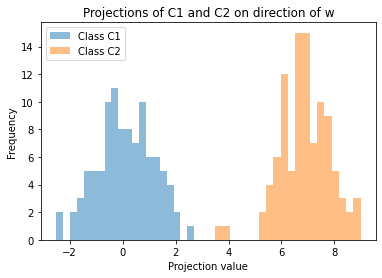

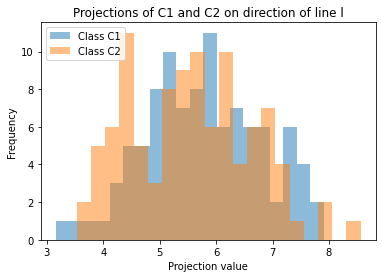

In [7]:
###Question 4

import matplotlib.pyplot as plt

# Calculate the projections of C1 and C2 points on the directions of w and l
C1_w = np.dot(C1, w)
C2_w = np.dot(C2, w)
C1_l = np.dot(C1 - p1, p2 - p1) / np.linalg.norm(p2 - p1)
C2_l = np.dot(C2 - p1, p2 - p1) / np.linalg.norm(p2 - p1)

# Draw histograms for both directions
plt.hist(C1_w, bins=20, alpha=0.5, label='Class C1')
plt.hist(C2_w, bins=20, alpha=0.5, label='Class C2')
plt.legend(loc='upper left')
plt.title('Projections of C1 and C2 on direction of w')
plt.xlabel('Projection value')
plt.ylabel('Frequency')
plt.show()

plt.hist(C1_l, bins=20, alpha=0.5, label='Class C1')
plt.hist(C2_l, bins=20, alpha=0.5, label='Class C2')
plt.legend(loc='upper left')
plt.title('Projections of C1 and C2 on direction of line l')
plt.xlabel('Projection value')
plt.ylabel('Frequency')
plt.show()


### We can interpret these results as follows:

#For the direction of w, we can see that the projections of C1 and C2 are well separated, with C1 points having higher positive
# projections and C2 points having higher negative projections. This indicates that w is a good feature to use for distinguishing
# between the two classes.

#For the direction of line l, we can see that there is some overlap between the projections of C1 and C2, especially in the 
# middle range of projection values. This suggests that l may not be as effective as w for distinguishing between the two classes,
# although there is still some separation between the two classes at the extremes of the projection range.

In [8]:
###Question 5

# Extract class C1 data
C1_data = data[:100]

# Calculate the mean distance of all points in C1 from the center point
mean_distance = np.mean(np.sqrt(np.sum(C1_data ** 2, axis=1)))

# Calculate the radius of the circular area
radius = mean_distance

# Loop through all points in C1 and count the number of points within the circular area
count = 0
for point in C1_data:
    distance = np.sqrt(np.sum(point ** 2))
    if distance <= radius:
        count += 1

# Calculate the probability that a point in C1 belongs to the circular area
probability = count / len(C1_data)

print("Probability:", probability)

Probability: 0.58


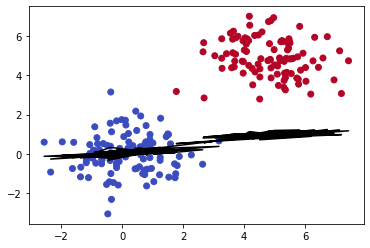

In [12]:
###Question 6

from sklearn.linear_model import LinearRegression

# Split the data into training and test sets
X_train = data[:200]
y_train = np.concatenate((np.zeros(100), np.ones(100)))

# Create the linear regression model and fit it to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Visualize the result
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')
plt.plot(X_train[:,0], lr_model.predict(X_train), color='black')
plt.show()

# Upon inspection of the plot, we can see that a linear model may not be the best fit for this data as there are many points 
# that do not appear to follow a linear trend. Additionally, there may be issues with overfitting or underfitting if we attempt 
# to use this model on new data.